# Meta (Facebook) Q3 Earnings Call and Founder's Letter
This Notebook will be used to practice NLP on Meta's Q3 2021 Earnings call as well as their statement that explained the changing of the company's name form Facebook to Meta.

#### Imports:

In [1]:
import numpy as np
import pandas as pd
import random

from PyPDF2 import PdfFileReader
import tkinter
import re
import unicodedata
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator, get_single_color_func


import matplotlib.pyplot as plt
import seaborn as sns

import prepare as prep

## Q3 Earnings Call Transcripts

In [2]:

filename = 'FB-Q3-2021-Earnings-Call-Transcript.pdf'
reader = PdfFileReader(filename)
page_obj = reader.getNumPages()
for page_count in range(page_obj):
    page = reader.getPage(page_count)
    page_data = page.extractText()
page_data

"20\n \n \n \nWe'll also be dedicating that to ads as we work\n \nto improve ads relevance and \nleveraging machine learning and AI to help balance out the loss of signal that we've \nexperienced \nfrom\n \nsome of the platform changes. \n \n \n \nSo we think that we can, as part of sort of making our ads even more effective, \nmake up for\n \nthat loss with the large investments on the machine learning and AI \nside. And I think our position gives us a good ability to do that. So that's really part \nof the logic behind the big increase in the CapEx budget next year.\n \n \nDeborah Crawford\n:\n \nGreat. Than\nk you again for joining us today. We appreciate your time, and we look \nforward to speaking with you again.\n \n \nOperator\n:\n \nAnd this concludes today's conference call. Thank you for joining us. You may now \ndisconnect your lines.\n \n \n"

## Founders Letter 2021

'<!DOCTYPE html>\n<!--[if lt IE 8]>      <html class="lt-ie10 lt-ie9 lt-ie8" lang="en-US"> <![endif]-->\n<!--[if IE 8]>         <html class="lt-ie10 lt-ie9" lang="en-US"> <![endif]-->\n<!--[if IE 9]>         <html class="lt-ie10" lang="en-US"> <![endif]-->\n<!--[if gt IE 9]><!--> <html xmlns="http://www.w3.org/1999/xhtml" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" lang="en-US"> <!--<![endif]-->\n<html lang="en-US">\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\n\t<link rel="pingback" href="https://about.fb.com/xmlrpc.php">\n\t<meta name=\'robots\' content=\'max-image-preview:large\' />\n<!-- Feed RSS/XML -->\n<link rel="alternate" type="application/rss+xml" title="Meta Feed" href="https://about.fb.com/feed/">\n<!-- /end Feed RSS/XML -->\n\n<!-- Favicon/Icons -->\n<link rel="icon" href="https://about.fb.com/wp-content/uploads/2021/10/meta-favicon.png?fit=16%2C1
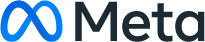

In [3]:
response = requests.get('https://about.fb.com/news/2021/10/founders-letter/', 
                       headers={'user-agent': 'codeup data science germain cohort'})
html = response.text
html

<!DOCTYPE html>
<!--[if lt IE 8]>      <html class="lt-ie10 lt-ie9 lt-ie8" lang="en-US"> <![endif]--><!--[if IE 8]>         <html class="lt-ie10 lt-ie9" lang="en-US"> <![endif]--><!--[if IE 9]>         <html class="lt-ie10" lang="en-US"> <![endif]--><!--[if gt IE 9]><!--><html lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" xmlns="http://www.w3.org/1999/xhtml"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://about.fb.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<!-- Feed RSS/XML -->
<link href="https://about.fb.com/feed/" rel="alternate" title="Meta Feed" type="application/rss+xml"/>
<!-- /end Feed RSS/XML -->
<!-- Favicon/Icons -->
<link href="https://about.fb.com/wp-content/uploads/2021/10/meta-favicon.png?fit=16%2C16" rel="icon" sizes="32x32"/>
<link href="https://about.fb.com/w
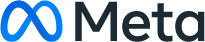

In [4]:
soup = BeautifulSoup(html)
soup

In [5]:
letter = soup.select('div.entry-content')[0].text
letter 

'\n\nWe are at the beginning of the next chapter for the internet, and it’s the next chapter for our company too.\nIn recent decades, technology has given people the power to connect and express ourselves more naturally. When I started Facebook, we mostly typed text on websites. When we got phones with cameras, the internet became more visual and mobile. As connections got faster, video became a richer way to share experiences. We’ve gone from desktop to web to mobile; from text to photos to video. But this isn’t the end of the line.\nThe next platform will be even more immersive — an embodied internet where you’re in the experience, not just looking at it. We call this the metaverse, and it will touch every product we build.\nThe defining quality of the metaverse will be a feeling of presence — like you are right there with another person or in another place. Feeling truly present with another person is the ultimate dream of social technology. That is why we are focused on building th

In [6]:
prep.prep_a_writting(letter)

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/Users/jeffakins/nltk_data'
    - '/usr/local/anaconda3/nltk_data'
    - '/usr/local/anaconda3/share/nltk_data'
    - '/usr/local/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
